<a href="https://colab.research.google.com/github/simodepth/Entities/blob/main/How_to_identify_Entities_and_Sentiment_from_a_Copy_Content_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#How do search engine understand a search query?

**NLU** (Natural Language Understanding) aims to **understand** what a block of natural language is communicating. 
One way to do that is identifying key entities within a text, also known as Natural Entities Recognition (**NER**).

#Requirements and Assumptions
- Python 3 is installed 
- Google Cloud Platform account
- [NLP API Enabled](https://cloud.google.com/natural-language/docs)
- Credentials created (service account) and JSON file downloaded
- NLP JSON key API is uploaded **every time you run this script**




In [24]:
#@title Import Modules
import os
from google.cloud import language_v1
from google.cloud.language_v1 import enums

from google.cloud import language
from google.cloud.language import types

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [30]:
#@title Wrap the JSON-LD key API into a call
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "/content/nlp-api-348917-9095c7f4e634.json"


In [26]:
#@title Text Tokenization
text = 'Team up with The Avengers to battle environmental enemies with our officially licensed Marvel pyjamas and character clothing, made sustainably from premium, organic and recycled fabrics. Save the world in comfort with Marvel t-shirts for kids, including other clothing such as onesies and Marvel pjs sets. Top quality and sustainable items make our Marvel clothing as comfortable as it is cool. Made ethically and build to last, you can don your superhero kit knowing you’re helping do good for the planet and supporting a family business. We know Marvel isn’t just for the kids. For adults who want a taste of the superhero life, we have a range of Marvel pyjamas and clothing so you can get in on the action. Shop from Marvel t-shirts and tops, to super cosy Marvel robes and onesies. And if you’re looking for a wardrobe essential, then get your hands on Marvel hoodies.'
text.split()


['Team',
 'up',
 'with',
 'The',
 'Avengers',
 'to',
 'battle',
 'environmental',
 'enemies',
 'with',
 'our',
 'officially',
 'licensed',
 'Marvel',
 'pyjamas',
 'and',
 'character',
 'clothing,',
 'made',
 'sustainably',
 'from',
 'premium,',
 'organic',
 'and',
 'recycled',
 'fabrics.',
 'Save',
 'the',
 'world',
 'in',
 'comfort',
 'with',
 'Marvel',
 't-shirts',
 'for',
 'kids,',
 'including',
 'other',
 'clothing',
 'such',
 'as',
 'onesies',
 'and',
 'Marvel',
 'pjs',
 'sets.',
 'Top',
 'quality',
 'and',
 'sustainable',
 'items',
 'make',
 'our',
 'Marvel',
 'clothing',
 'as',
 'comfortable',
 'as',
 'it',
 'is',
 'cool.',
 'Made',
 'ethically',
 'and',
 'build',
 'to',
 'last,',
 'you',
 'can',
 'don',
 'your',
 'superhero',
 'kit',
 'knowing',
 'you’re',
 'helping',
 'do',
 'good',
 'for',
 'the',
 'planet',
 'and',
 'supporting',
 'a',
 'family',
 'business.',
 'We',
 'know',
 'Marvel',
 'isn’t',
 'just',
 'for',
 'the',
 'kids.',
 'For',
 'adults',
 'who',
 'want',
 'a',
 '

In [27]:
#@title Stemming Words
from nltk.stem import PorterStemmer
porter = PorterStemmer()
#create an object of class PorterStemmer
porter = PorterStemmer()
#A list of words to be stemmed
word_list = ["pyjamas", "clothing", "superhero", "adults","kids","planet","organic","comfortable","sustainability","onesies", "robes", "recycled", "premium", "enemies", "environmental", "character", "clothing", ]
print("{0:20}{1:20}".format("Word","Porter Stemmer"))
for word in word_list:
    print("{0:20}{1:20}".format(word,porter.stem(word)))


Word                Porter Stemmer      
pyjamas             pyjama              
clothing            cloth               
superhero           superhero           
adults              adult               
kids                kid                 
planet              planet              
organic             organ               
comfortable         comfort             
sustainability      sustain             
onesies             onesi               
robes               robe                
recycled            recycl              
premium             premium             
enemies             enemi               
environmental       environment         
character           charact             
clothing            cloth               


📔 **Porter Stemming Algorithm** is the most popular among stemming algorithms as it’s been the benchmark for stemming since 1980

In [28]:
#@title Extract Recognizable Words with Lemmatization
# Install spaCy (run in terminal/prompt)
import sys
!{sys.executable} -m pip install spacy

# Download spaCy's  'en' Model
!{sys.executable} -m spacy download en

import spacy

# Initialize spacy 'en' model, keeping only tagger component needed for lemmatization
nlp = spacy.load('en', disable=['parser', 'ner'])

sentence = "Team up with The Avengers to battle environmental enemies with our officially licensed Marvel pyjamas and character clothing, made sustainably from premium, organic and recycled fabrics. Save the world in comfort with Marvel t-shirts for kids, including other clothing such as onesies and Marvel pjs sets. Top quality and sustainable items make our Marvel clothing as comfortable as it is cool. Made ethically and build to last, you can don your superhero kit knowing you’re helping do good for the planet and supporting a family business. We know Marvel isn’t just for the kids. For adults who want a taste of the superhero life, we have a range of Marvel pyjamas and clothing so you can get in on the action. Shop from Marvel t-shirts and tops, to super cosy Marvel robes and onesies. And if you’re looking for a wardrobe essential, then get your hands on Marvel hoodies."
# Parse the sentence using the loaded 'en' model object `nlp`
doc = nlp(sentence)

# Extract the lemma for each token and join
" ".join([token.lemma_ for token in doc])

     |████████████████████████████████| 12.0 MB 5.0 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


'team up with the Avengers to battle environmental enemy with -PRON- officially license Marvel pyjama and character clothing , make sustainably from premium , organic and recycled fabric . save the world in comfort with Marvel t - shirt for kid , include other clothing such as onesie and Marvel pjs set . top quality and sustainable item make -PRON- Marvel clothing as comfortable as -PRON- be cool . make ethically and build to last , -PRON- can don -PRON- superhero kit know -PRON- be help do good for the planet and support a family business . -PRON- know Marvel be not just for the kid . for adult who want a taste of the superhero life , -PRON- have a range of Marvel pyjama and clothing so -PRON- can get in on the action . shop from Marvel t - shirt and top , to super cosy Marvel robe and onesie . and if -PRON- be look for a wardrobe essential , then get -PRON- hand on Marvel hoodie .'

📔 **spaCy** is relatively new in the space and is billed as an industrial strength NLP engine.
✅ see the **-PRON-** character coming up whenever spacy detects a pronoun.

#Manually review and parse the new lemmatized sentence in plain English

In [31]:
#@title Identify Entities
#paste the reviewed sentence within the "text_content" function 
text_content = "team up with the Avengers to battle environmental enemy with our officially license Marvel pyjama and character clothing , make sustainably from premium , organic and recycled fabric . save the world in comfort with Marvel t - shirt for kid , include other clothing such as onesie and Marvel pjs set . top quality and sustainable item make our Marvel clothing as comfortable as they are cool . make ethically and build to last , you can have your superhero kit know to help do good for the planet and support a family business .  For adult who want a taste of the superhero life , we have a range of Marvel pyjama and clothing so you can get in on the action . Shop from Marvel t - shirt and top , to super cosy Marvel robe and onesie . And if you look for a wardrobe essential , then get hand on Marvel hoodie"

text_content = text_content[0:1000]

client = language_v1.LanguageServiceClient()

type_ = enums.Document.Type.PLAIN_TEXT

language = "en"
document = {"content": text_content, "type": type_, "language": language}

encoding_type = enums.EncodingType.UTF8

response = client.analyze_entities(document, encoding_type=encoding_type)

for entity in response.entities:
    print(u"Entity Name: {}".format(entity.name))

    print(u"Entity type: {}".format(enums.Entity.Type(entity.type).name))

    print(u"Salience score: {}".format(round(entity.salience,3)))

    for metadata_name, metadata_value in entity.metadata.items():
        print(u"{}: {}".format(metadata_name, metadata_value))

    print('\n')

Entity Name: Marvel
Entity type: ORGANIZATION
Salience score: 0.385


Entity Name: character clothing
Entity type: OTHER
Salience score: 0.105


Entity Name: pyjama
Entity type: CONSUMER_GOOD
Salience score: 0.089


Entity Name: enemy
Entity type: OTHER
Salience score: 0.079


Entity Name: Avengers
Entity type: PERSON
Salience score: 0.047


Entity Name: premium
Entity type: OTHER
Salience score: 0.03


Entity Name: fabric
Entity type: OTHER
Salience score: 0.03


Entity Name: adult
Entity type: PERSON
Salience score: 0.023


Entity Name: t - shirt
Entity type: CONSUMER_GOOD
Salience score: 0.017


Entity Name: world
Entity type: LOCATION
Salience score: 0.015


Entity Name: comfort
Entity type: OTHER
Salience score: 0.015


Entity Name: clothing
Entity type: CONSUMER_GOOD
Salience score: 0.013


Entity Name: clothing
Entity type: CONSUMER_GOOD
Salience score: 0.013


Entity Name: onesie
Entity type: CONSUMER_GOOD
Salience score: 0.011


Entity Name: pjs set
Entity type: OTHER
Salience



**"Salience score"** is a metric of calculated importance in relation to the rest of the text.

Entities with **MIDS** indicate Google has strong confidence of understanding and it likely has a comprehensive spot in the Google Knowledge Graph!




Sentiment Score: 0.5 is Positive


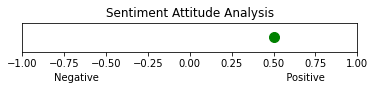

In [ ]:
#@title Get and idea of the Sentiment 
document = types.Document(
    content=text_content,
    type=enums.Document.Type.PLAIN_TEXT)

sentiment = client.analyze_sentiment(document=document).document_sentiment
sscore = round(sentiment.score,4)
smag = round(sentiment.magnitude,4)

if sscore < 1 and sscore < -0.5:
  sent_label = "Very Negative"
elif sscore < 0 and sscore > -0.5:
  sent_label = "Negative"
elif sscore == 0:
  sent_label = "Neutral"
elif sscore > 0.5:
  sent_label = "Very Positive"
elif sscore > 0 and sscore < 0.5:
  sent_label = "Positive"

print('Sentiment Score: {} is {}'.format(sscore,sent_label))

predictedY =[sscore] 
UnlabelledY=[0,1,0]

if sscore < 0:
    plotcolor = 'red'
else:
    plotcolor = 'green'

plt.scatter(predictedY, np.zeros_like(predictedY),color=plotcolor,s=100)

plt.yticks([])
plt.subplots_adjust(top=0.9,bottom=0.8)
plt.xlim(-1,1)
plt.xlabel('Negative                                                            Positive')
plt.title("Sentiment Attitude Analysis")
plt.show()

Sentiment Magnitude: 5.1 is High Emotion


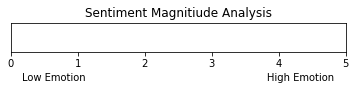

In [ ]:
#@title Calculate the perceived amount of emotion in a text.
if smag > 0 and smag < 1:
  sent_m_label = "No Emotion"
elif smag > 2:
  sent_m_label = "High Emotion"
elif smag > 1 and smag < 2:
  sent_m_label = "Low Emotion"

print('Sentiment Magnitude: {} is {}'.format(smag,sent_m_label))

predictedY =[smag] 
UnlabelledY=[0,1,0]

if smag > 0 and smag < 2:
    plotcolor = 'red'
else:
    plotcolor = 'green'

plt.scatter(predictedY, np.zeros_like(predictedY),color=plotcolor,s=100)

plt.yticks([])
plt.subplots_adjust(top=0.9,bottom=0.8)
plt.xlim(0,5)
plt.xlabel('Low Emotion                                                          High Emotion')
plt.title("Sentiment Magnitiude Analysis")
plt.show()


In [ ]:
#@title Calculate Categorization
response = client.classify_text(document)

for category in response.categories:
    print(u"Category name: {}".format(category.name))
    print(u"Confidence: {}%".format(int(round(category.confidence,3)*100)))

Category name: /Arts & Entertainment/Comics & Animation/Comics
Confidence: 81%
Category name: /Shopping/Apparel
Confidence: 72%


⏬ 
The NLP will process the text it’s given and try to place it into any number of preset categories where there is a high enough confidence.

